In [3]:
# Essentials

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing some NLP libraries

import nltk
from nltk.tokenize import word_tokenize
from sklearn import re
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
from nltk import FreqDist 
 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# Importing models

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

### Loading data

In [4]:
data = pd.read_csv('C:/Users/admin/Desktop/data/Data Sets/Twitter/twitter.csv', encoding = 'latin')

### EDA

In [5]:
# dispaly the data how it looks like

data.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [6]:
# Checking shape of the data that how many rows and columns are there in our data 

data.shape

(99989, 3)

In [7]:
# Checking the different types of values in the target(Sentiment) column 

data['Sentiment'].value_counts()

1    56457
0    43532
Name: Sentiment, dtype: int64

In [8]:
# cheching if there is any null value inn our data 

data.isnull().sum()

ItemID           0
Sentiment        0
SentimentText    0
dtype: int64

No null value are there in our data

####  Some Questions for EDA so we can come more close to our data

1. Total words in corpus
2. Total unique words in corpus
3. Total unique words in corpus after lowercase
4. Total unique words in corpus after lowercase, stemming / lemmatization
5. Total unique words in corpus after lowercase, stemming / lemmatization and stopwords removal

### Counting total number of word in corpus

In [9]:
# Creating a function to check the count of words in ecch document or tweet

def word_count(tweet):
    
    # making all the words in lower case
    tweet = tweet.lower()
    
    # tokenization
    tweet = word_tokenize(tweet)
    
    # counting the number of words
    tweet = len(tweet)
    return tweet

In [10]:
# Making a new column in the data to store the count number of words of a particular document or tweet

data['word_count'] = data['SentimentText'].apply(word_count)

In [11]:
# Print data to check the newly added column and word count

data.head()

,ItemID,Sentiment,SentimentText,word_count
0,1,0,is so sad for my APL frie...,12
1,2,0,I missed the New Moon trail...,7
2,3,1,omg its already 7:30 :O,6
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,31
4,5,0,i think mi bf is cheating on me!!! ...,12


In [12]:
# counting total number of words in corpus

total_words = data['word_count'].sum()
total_words

1720056

### Checking total unique number of words in corpus

In [13]:
# Combinig all the words in a variable
combined_words = ' '.join(data['SentimentText'])

# Tokenizing all the words
combined_words_toked = word_tokenize(combined_words)

# Making set of the tokenized words to store the unique words
unique_words = set(combined_words_toked)

# Storing the total unique number of words
total_unique_words = len(unique_words)

# Printing total unique number of words in corpus
total_unique_words

133560

### Checking total unique number of words in corpus after lower case

In [14]:
# Combinig all the words in a variable
combined_words = ' '.join(data['SentimentText'])

# Converting the words in lower case
combined_words_lr = combined_words.lower()

# Tokenizing all the words
combined_words_toked = word_tokenize(combined_words_lr)

# Making set of the tokenized words to store the unique words
unique_words = set(combined_words_toked)

# Storing the total uniquq number of words
total_unique_words = len(unique_words)

# Printing total unique number of words in corpus after lower case
total_unique_words

117940

### Cheking total unique words in corpus after lowercase & stemming / lemmatization

In [15]:
# Initializing WordNetLemmatizer to perform the lemmatization

lemma = WordNetLemmatizer()

In [16]:
# Combinig all the words in a variable
combined_words = ' '.join(data['SentimentText'])

# Converting the words in lower case
combined_words_lr = combined_words.lower()

# Tokenizing all the words
combined_words_toked = word_tokenize(combined_words_lr)

# lammatization
combined_words_lemmatized = [lemma.lemmatize(word) for word in combined_words_toked]

# Making set of the tokenized words to store the unique words
unique_words = set(combined_words_lemmatized)

# Storing the total unique number of words
total_unique_words = len(unique_words)

# Printing total unique number of words in corpus after lower case and lemmatization
total_unique_words

114193

### Cheking total unique words in corpus after lowercase, stemming / lemmatization & stopwords removal

In [17]:
# Storing all the stopwords in a variable
stop_words = set(stopwords.words('english')+list(punctuation))

# Printing stopwords
print(stop_words)
print()

# checking total numbers of stopwords
print('total number of stopwords are: ', len(stop_words))

{'between', 'll', 'which', 'shouldn', 'haven', 'yourselves', "wouldn't", 'wouldn', 'your', 'nor', 'their', 'was', "mustn't", "you're", 'has', 'we', 'what', 'if', 'such', 'his', 'about', 'while', '{', 'same', 'against', 'y', 'were', 'being', 'he', "she's", 'ourselves', 'but', 'shan', 'where', '?', 'ain', "aren't", 'a', '^', '/', "shouldn't", ',', 'into', '>', 'too', "it's", "won't", 'ma', 'won', 'by', 'above', '-', 'than', 'those', 'they', 'him', '#', '*', 'her', 'own', 'how', 'myself', 'hers', 'under', 'each', '_', "'", 'very', 're', "that'll", '@', 'down', "doesn't", 'them', 'its', 'the', 'did', '.', 'until', 'my', 'didn', "hadn't", '}', 'you', 'do', 'can', 'd', "mightn't", 's', 'wasn', '+', ';', 'it', 'be', 'for', "wasn't", 'me', 'couldn', 'had', 'himself', 'so', 'aren', ')', 'our', 'of', 'below', 'again', 'further', 'here', 'at', '[', 'or', 'once', 'been', 'more', 'any', '=', 'does', '!', 'are', '&', 'on', 'over', 'ours', 'there', 'during', 'needn', 'doing', 'through', "needn't", 'b

In [18]:
# Combinig all the words in a variable
combined_words = ' '.join(data['SentimentText'])

# Converting the words in lower case
combined_words_lr = combined_words.lower()

# Tokenizing all the words
combined_words_toked = word_tokenize(combined_words_lr)

# lammatization
combined_words_lemmatized = [lemma.lemmatize(word) for word in combined_words_toked]

# Removing stopwords
stop_words_removed = [word for word in combined_words_lemmatized if word not in stop_words]

# Making set of the tokenized words to store the unique words
unique_words = set(stop_words_removed)

# Storing the total unique number of words
total_unique_words = len(unique_words)

# Printing total unique number of words in corpus after lower case and lemmatization
total_unique_words

114021

### Normalizing the SentimentText column with creating a new column in the dataset

In [19]:
# Creating a function that normalize our data by removing some unusual words
def normalizer(tweet):
    # Lower case the tweet
    tweet = tweet.lower()
    
    # Substitute mentions
    tweet = re.sub('@\w+', '__mention__', tweet)
    
    # Substitute hashtags
    tweet = re.sub('#\w+', '__hashtag__', tweet)
    
    # Substitute dates
    tweet = re.sub('\d\d\/\d\d\/\d\d\d\d', '__date__', tweet)
    
    # Substitute links
    tweet = re.sub('http.*|https.*|t.co\/.*', '__link__', tweet)
    
    # Substitute numbers
    tweet = re.sub('^\d+\s|\s\d+$|\s\d+\s', '__number__', tweet)
    
    return tweet

In [20]:
# Creating a new column and store the normalize text in it by applying the above created function(normalizer)

data['norm_text'] = data['SentimentText'].apply(normalizer)

In [21]:
# Checking newly create column

data

,ItemID,Sentiment,SentimentText,word_count,norm_text
0,1,0,is so sad for my APL frie...,12,is so sad for my apl frie...
1,2,0,I missed the New Moon trail...,7,i missed the new moon trail...
2,3,1,omg its already 7:30 :O,6,omg its already 7:30 :o
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,31,.. omgaga. im sooo im gunna cry. i'...
4,5,0,i think mi bf is cheating on me!!! ...,12,i think mi bf is cheating on me!!! ...
5,6,0,or i just worry too much?,7,or i just worry too much?
6,7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!,4,juuuuuuuuuuuuuuuuussssst chillin!!
7,8,0,Sunny Again Work Tomorrow :-| ...,8,sunny again work tomorrow :-| ...
8,9,1,handed in my uniform today . i miss you ...,10,handed in my uniform today . i miss you ...
9,10,1,hmmmm.... i wonder how she my number @-),12,hmmmm.... i wonder how she my number @-)


We can see above in the data and assume that our new normalized column has been created

### Creating a new column that store the hashtag words use for both positive and negative tweets in the data 

In [22]:
# Creating a function that filter the hashtag words used in the tweets
def extract_hashtag(tweet):
    
    # filtering all the hashtag words
    tweets = " ".join(filter(lambda x: x[0]== '#', tweet.split()))
    
    # substituting the all excluding alphabets
    tweets = re.sub('[^a-zA-Z]',' ',  tweets)
    
    # converting to the lower case
    tweets = tweets.lower()
    
    # lemmatization
    tweets = [lemma.lemmatize(word) for word in tweets]
    
    # joing alphabets
    tweets = "".join(tweets)
    
    
    return tweets

In [23]:
# Creating a new column to store the hashtag words

data['hashtag'] = data['SentimentText'].apply(extract_hashtag)

In [24]:
# Checking the newly created column

data

,ItemID,Sentiment,SentimentText,word_count,norm_text,hashtag
0,1,0,is so sad for my APL frie...,12,is so sad for my apl frie...,
1,2,0,I missed the New Moon trail...,7,i missed the new moon trail...,
2,3,1,omg its already 7:30 :O,6,omg its already 7:30 :o,
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,31,.. omgaga. im sooo im gunna cry. i'...,
4,5,0,i think mi bf is cheating on me!!! ...,12,i think mi bf is cheating on me!!! ...,
5,6,0,or i just worry too much?,7,or i just worry too much?,
6,7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!,4,juuuuuuuuuuuuuuuuussssst chillin!!,
7,8,0,Sunny Again Work Tomorrow :-| ...,8,sunny again work tomorrow :-| ...,
8,9,1,handed in my uniform today . i miss you ...,10,handed in my uniform today . i miss you ...,
9,10,1,hmmmm.... i wonder how she my number @-),12,hmmmm.... i wonder how she my number @-),


### Ploting the word cloud for all words, positive words and negative words

In [25]:
# Storing all the words in a variabel

total_words = ' '.join(data['norm_text'])

In [26]:
# Storing words contaning positive tweets in a variable

positive_sent = ' '.join(data[data['Sentiment'] == 1]['norm_text'])

In [27]:
# Storing words contaning nagative tweets in a variable 

negative_sent = ' '.join(data[data['Sentiment'] == 0]['norm_text'])

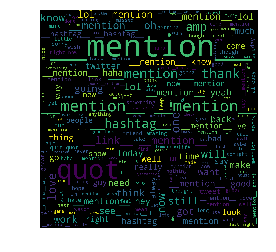

In [28]:
# Ploting cloud words for all tweet words

wordcloud = WordCloud(height=2000, width=2000, stopwords=STOPWORDS)
wordcloud = wordcloud.generate(total_words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

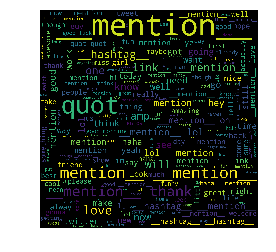

In [29]:
# Ploting words containg positive tweets

wordcloud = WordCloud(height=2000, width=2000, stopwords=STOPWORDS)
wordcloud = wordcloud.generate(positive_sent)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

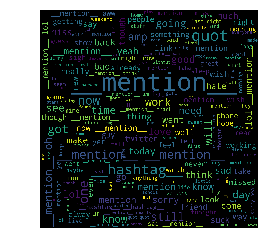

In [30]:
# Ploting words containg negative tweets

wordcloud = WordCloud(height=2000, width=2000, stopwords=STOPWORDS)
wordcloud = wordcloud.generate(negative_sent)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

With the help of cloud word plot we can check which words are mostly used in which sentiment

In [31]:
# Cheking the most common hashtag word used in all sentiment

hashtag_dist = FreqDist(list((' '.join(data['hashtag'])).split())).most_common(10)
hashtag_dist

[('followfriday', 597),
 ('iremember', 196),
 ('musicmonday', 194),
 ('myweakness', 181),
 ('ff', 169),
 ('squarespace', 133),
 ('inaperfectworld', 132),
 ('haveyouever', 109),
 ('bsb', 107),
 ('iranelection', 78)]

In [32]:
# Cheking the most common hashtag word used in nagetive sentiment

hashtag_dist_neg = FreqDist(list((' '.join(data[data['Sentiment'] == 0]['hashtag'])).split())).most_common(10)
hashtag_dist_neg

[('inaperfectworld', 132),
 ('iremember', 98),
 ('squarespace', 93),
 ('dontyouhate', 75),
 ('haveyouever', 66),
 ('iranelection', 63),
 ('bts', 40),
 ('bgt', 37),
 ('bsb', 36),
 ('myweakness', 36)]

In [33]:
# Cheking the most common hashtag word used in positive sentiment

hashtag_dist_pos = FreqDist(list((' '.join(data[data['Sentiment'] == 1]['hashtag'])).split())).most_common(10)
hashtag_dist_pos

[('followfriday', 567),
 ('musicmonday', 187),
 ('ff', 151),
 ('myweakness', 145),
 ('iremember', 98),
 ('bsb', 71),
 ('goodsex', 62),
 ('marsiscoming', 50),
 ('shortstack', 43),
 ('haveyouever', 43)]

with these hashtag words we can analysis easily which hashtag belongs to which sentiment

#### Ploting the hashtag frequency distribution for all sentiment, positive sentiment, negative sentiment

In [34]:
hashtag_dist_df = pd.DataFrame(hashtag_dist, columns = ['words', 'frequency'])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

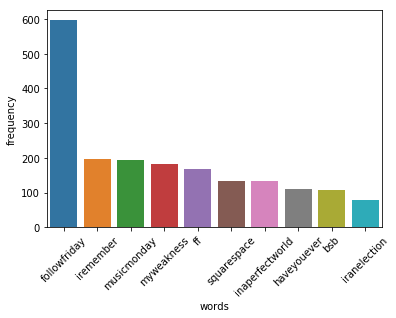

In [35]:
sns.barplot(x = 'words', y = 'frequency', data = hashtag_dist_df)
plt.xticks(rotation = 45)

In [36]:
hashtag_neg_df = pd.DataFrame(hashtag_dist_neg, columns = ['words', 'frequency'])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

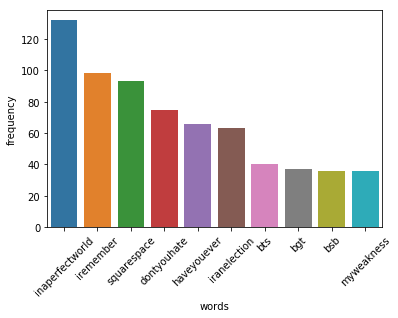

In [37]:
sns.barplot(x = 'words', y = 'frequency', data = hashtag_neg_df)
plt.xticks(rotation = 45)

In [38]:
hashtag_pos_dist = pd.DataFrame(hashtag_dist_pos, columns = ['words', 'frequency'])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

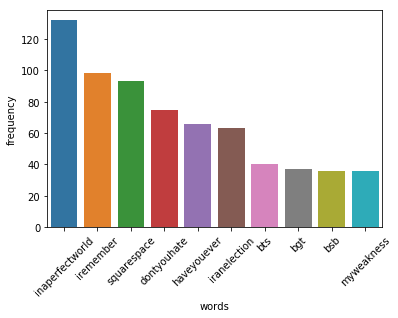

In [39]:
sns.barplot(x = 'words', y = 'frequency', data = hashtag_neg_df)
plt.xticks(rotation = 45)

### Fit and apply Models

In [40]:
# Initializing models

# Initializing LogisticRegression model
lr = LogisticRegression()

# Initializing RandomForestClassifier model
rfc = RandomForestClassifier()

# Initializing VotingClassifier hard model
vot_hard = VotingClassifier([('rf', rfc), ('lr', lr)], voting='hard')

# Initializing VotingClassifier soft model
vot_soft = VotingClassifier([('rf', rfc), ('lr', lr)], voting='soft')

#### We are going to check either CountVectorizer gives good performance or TFIDF

In [45]:
# Initializing Vectorizers

cv = CountVectorizer(ngram_range=(1, 3))
tfidf = CountVectorizer(ngram_range=(1, 3))

### Applying models with TFIDF

In [47]:
# Create X & y

X = data['norm_text']
y = data['Sentiment']

# Split data in to train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)

# Fit and transform vectors for X_train

tfidf_train = tfidf.fit_transform(X_train)

# Transform X_test to vectors

tfidf_X_test = tfidf.transform(X_test)

# Fit and predict

print('Random Forest Results')
print('---------------------')
rfc.fit(tfidf_train, y_train)
y_pred = rfc.predict(tfidf_X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print()

print('Logistic Regression Results')
print('---------------------')
lr.fit(tfidf_train, y_train)
y_pred = lr.predict(tfidf_X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print()

print('Voting Classifier Hard Results')
print('---------------------')
vot_hard.fit(tfidf_train, y_train)
y_pred = vot_hard.predict(tfidf_X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print()

print('Voting Classifier Soft Results')
print('---------------------')
vot_soft.fit(tfidf_train, y_train)
y_pred = vot_soft.predict(tfidf_X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Random Forest Results
---------------------
              precision    recall  f1-score   support

           0       0.68      0.69      0.69     13064
           1       0.76      0.75      0.76     16933

    accuracy                           0.73     29997
   macro avg       0.72      0.72      0.72     29997
weighted avg       0.73      0.73      0.73     29997

[[ 9065  3999]
 [ 4230 12703]]

Logistic Regression Results
---------------------


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.77      0.71      0.74     13064
           1       0.79      0.84      0.81     16933

    accuracy                           0.78     29997
   macro avg       0.78      0.77      0.77     29997
weighted avg       0.78      0.78      0.78     29997

[[ 9249  3815]
 [ 2781 14152]]

Voting Classifier Hard Results
---------------------


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.68      0.81      0.74     13064
           1       0.82      0.71      0.76     16933

    accuracy                           0.75     29997
   macro avg       0.75      0.76      0.75     29997
weighted avg       0.76      0.75      0.75     29997

[[10518  2546]
 [ 4946 11987]]

Voting Classifier Soft Results
---------------------


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.77      0.70      0.73     13064
           1       0.78      0.84      0.81     16933

    accuracy                           0.78     29997
   macro avg       0.78      0.77      0.77     29997
weighted avg       0.78      0.78      0.78     29997

[[ 9121  3943]
 [ 2752 14181]]


### Applying models with Count Vectorizer

In [48]:
# Create X & y

X = data['norm_text']
y = data['Sentiment']

# Split data in to train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)

# Fit and transform vectors for X_train

cv_train = cv.fit_transform(X_train)

# Transform X_test to vectors

cv_X_test = cv.transform(X_test)

# Fit and predict

print('Random Forest Results')
print('---------------------')
rfc.fit(cv_train, y_train)
y_pred = rfc.predict(cv_X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print()

print('Logistic Regression Results')
print('---------------------')
lr.fit(cv_train, y_train)
y_pred = lr.predict(cv_X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print()

print('Voting Classifier Hard Results')
print('---------------------')
vot_hard.fit(cv_train, y_train)
y_pred = vot_hard.predict(cv_X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print()

print('Voting Classifier Soft Results')
print('---------------------')
vot_soft.fit(cv_train, y_train)
y_pred = vot_soft.predict(cv_X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Random Forest Results
---------------------
              precision    recall  f1-score   support

           0       0.68      0.69      0.69     13064
           1       0.76      0.75      0.75     16933

    accuracy                           0.72     29997
   macro avg       0.72      0.72      0.72     29997
weighted avg       0.72      0.72      0.72     29997

[[ 9004  4060]
 [ 4210 12723]]

Logistic Regression Results
---------------------


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.77      0.71      0.74     13064
           1       0.79      0.84      0.81     16933

    accuracy                           0.78     29997
   macro avg       0.78      0.77      0.77     29997
weighted avg       0.78      0.78      0.78     29997

[[ 9249  3815]
 [ 2781 14152]]

Voting Classifier Hard Results
---------------------


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.67      0.80      0.73     13064
           1       0.82      0.70      0.76     16933

    accuracy                           0.75     29997
   macro avg       0.75      0.75      0.74     29997
weighted avg       0.76      0.75      0.75     29997

[[10507  2557]
 [ 5092 11841]]

Voting Classifier Soft Results
---------------------


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.76      0.69      0.73     13064
           1       0.78      0.83      0.81     16933

    accuracy                           0.77     29997
   macro avg       0.77      0.76      0.77     29997
weighted avg       0.77      0.77      0.77     29997

[[ 9031  4033]
 [ 2795 14138]]


As for the above applied model we can see that TFIDF vectorizer has given better accuracy that CountVectorizer

### Model Performance

Text(0.5,1,'Scores of Models')

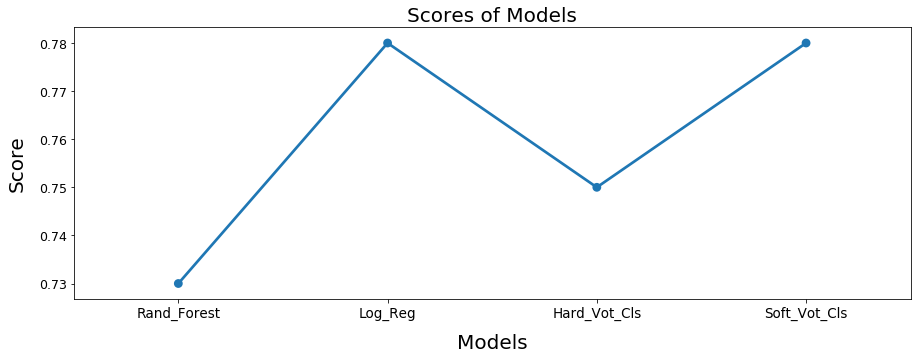

In [49]:
# Plot the model performance with the line plot

plt.figure(figsize = (15, 5))
sns.pointplot(x = ['Rand_Forest', 'Log_Reg', 'Hard_Vot_Cls', 'Soft_Vot_Cls'], y = [0.73, 0.78, 0.75, 0.78], markers=['o'], linestyles=['-'])
plt.ylabel('Score', size=20, labelpad=12.5)
plt.xlabel('Models', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)
plt.title('Scores of Models', size=20)

As the Logistic Regresion and Hard Voting Classifier gives the best equal result for the Sentiment analysis

#### Final prediction with Logistic Regression model  using TFIDF countorizer with ngram_range(1, 3)

In [41]:
# Initializing model

model_final = LogisticRegression()

In [42]:
# Seperating dependent and independent variables

X_final = data['norm_text']
y_final = data['Sentiment']

In [43]:
# spliting data

X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_final, y_final, test_size = 0.3, random_state = 0)

In [46]:
# Vectorization

tfidf_X_train_final = tfidf.fit_transform(X_train_final)
tfidf_X_test_final = tfidf.transform(X_test_final)

In [47]:
# Fitting model

model_final.fit(tfidf_X_train_final, y_train_final)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
# Making prediction

y_pred_final = model_final.predict(tfidf_X_test_final)

In [49]:
# Printing classificaation report and confusion matrix

print(classification_report(y_test_final, y_pred_final))
print(confusion_matrix(y_test_final, y_pred_final))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74     13160
           1       0.78      0.83      0.81     16837

    accuracy                           0.78     29997
   macro avg       0.78      0.77      0.77     29997
weighted avg       0.78      0.78      0.78     29997

[[ 9302  3858]
 [ 2805 14032]]


In [52]:
# Making new dataframe for the actual values and predicted values

df = pd.DataFrame({'actual' : y_test_final,
                          'predicted' : y_pred_final})

In [54]:
# Saving our newly created datadrame

df.to_csv('C:/Users/admin/Desktop/data/Data Sets/Twitter/submission.csv')

In [57]:
# Checking values of our newly created dataframe

df

,actual,predicted
59041,0,0
50627,1,1
82548,1,1
65372,0,1
15823,1,1
28569,0,1
40611,1,1
14554,0,0
90781,1,1
73573,0,1
